# Ejercicio Clase 06 - Curso Astro Estadistica 2016

Se utilizara una base de datos propia para crear un estimador lineal de consumo de combustible.

Primero importo el archivo CSV con los datos:

In [3]:
from numpy import genfromtxt
data = genfromtxt('processed_data_GPRO.csv', delimiter=',')
#La primera fila son los headers
print(data.shape)
print(data)

(300, 50)
[[     nan      nan      nan ...,      nan      nan      nan]
 [   1.263  112.44       nan ...,   34.       1.       7.   ]
 [   1.303  129.03       nan ...,   34.       1.       7.   ]
 ..., 
 [   1.302  113.95       nan ...,   34.       1.       7.   ]
 [   1.454  134.846      nan ...,   34.       1.       7.   ]
 [   1.498  141.016      nan ...,   34.       1.       7.   ]]


Se separan los datos de entrada (matris) del vector resultados

In [4]:
data_X = data[1:,3:]
print(data_X)
data_Y = data[1:,0]
print(data_Y)

[[  3.   4.  11. ...,  34.   1.   7.]
 [  3.   4.  11. ...,  34.   1.   7.]
 [  3.   4.  11. ...,  34.   1.   7.]
 ..., 
 [  3.   3.  13. ...,  34.   1.   7.]
 [  3.   5.  11. ...,  34.   1.   7.]
 [  3.   5.  11. ...,  34.   1.   7.]]
[ 1.263  1.303  1.472  1.406  1.409  1.446  1.68   1.259  1.527  1.524
  1.253  1.244  1.244  1.161  1.31   1.31   1.3    1.304  1.308  1.308
  1.28   1.192  1.185  1.27   1.32   1.313  1.307  1.27   1.27   1.282
  1.274  1.175  1.249  1.624  1.3    1.291  1.267  1.325  1.325  1.297
  1.331  1.327  1.323  2.311  2.325  1.322  1.322  1.308  1.327  1.328
  1.355  1.361  1.353  1.393  1.33   1.341  1.341  1.317  1.266  1.266
  1.258  1.26   1.26   1.228  1.317  1.317  1.317  1.226  1.326  1.33
  1.413  1.413  1.4    1.493  1.493  1.817  1.722  2.129  1.367  1.361
  1.361  1.356  1.356  1.356  1.356  2.073  2.047  1.531  1.531  1.521
  1.356  1.356  1.341  1.435  1.43   1.434  1.268  1.268  1.27   1.342
  1.471  1.427  1.362  1.328  1.457  1.477  1.477  1.42

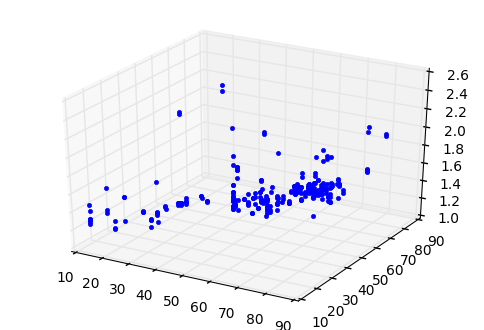

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x = data_X[:,18]
y = data_X[:,19]
z = data_Y
ax.plot(x, y, z, '.')

plt.show();

Se hace un split en el dataset para obtener las muestras ha utilizar para training y test

In [84]:
# we start by splitting our dataset into a training (75%) and a test set (25%):
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.25, random_state=42)

Se genera el regresor lineal y se realiza el entrenamiento

In [10]:
# Next, we use the learning algorithm implemented in LinearRegression to fit a regression model to the training data:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# After fitting to the training data, we paramerterized a linear regression model with the following values.
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [ -1.99779452e-02  -3.88380150e-03  -2.92998526e-03  -1.83333788e-03
  -3.06038004e-03   1.47089116e-03  -2.18154943e-03   1.19361939e-02
  -7.15404645e-03   3.24187823e-02  -5.31186372e-03  -5.27137965e-03
  -1.01943771e-02  -1.54365018e-02   9.64254566e-03  -8.27238693e-03
   4.60733164e-03   2.88258297e-02   1.98773380e-03  -3.18005407e-03
  -1.57958341e-03  -1.88100465e-04  -4.12171731e-04  -5.27192493e-03
  -3.87098453e-03   1.17394302e-02  -1.45608869e-02  -2.26320448e-03
   8.20708638e-02   8.36772454e-04  -2.49538036e-04   3.60679839e-03
  -6.55264586e-04  -7.60476010e-04  -1.03358136e-03   2.97697236e-04
  -7.88304438e-04  -2.50617612e-04   8.07699896e-03  -5.48098822e-06
   1.60083113e-04  -1.11454043e-03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
y-axis intercept:  1.62004658358


Ahora realizo el plot utilizando solo las dos variables seleccionadas en el primer plot de muestra

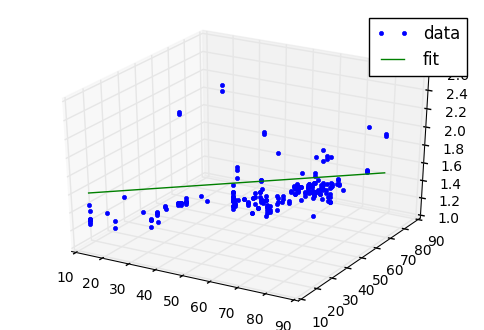

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

min_z_pt = X_train[:,18].min() * regressor.coef_[18] + X_train[:,19].min() * regressor.coef_[19] + regressor.intercept_
max_z_pt = X_train[:,18].max() * regressor.coef_[18] + X_train[:,19].max() * regressor.coef_[19] + regressor.intercept_

fig = plt.figure()
ax = fig.gca(projection='3d')

x = X_train[:,18]
y = X_train[:,19]
z = Y_train

ax.plot(x, y, z, '.', label="data")
ax.plot([X_train[:,18].min(),X_train[:,18].max()], [X_train[:,19].min(),X_train[:,19].max()], [min_z_pt,max_z_pt], label='fit')

plt.legend(loc='best')
plt.show();

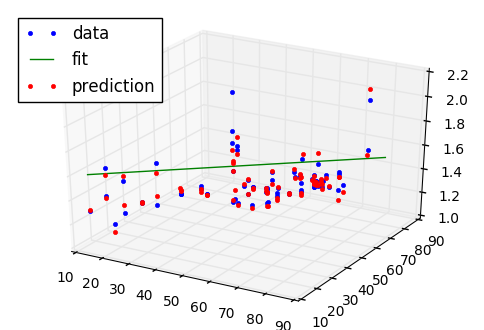

In [24]:
# we use the predict method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:
Y_pred_train = regressor.predict(X_test)

fig = plt.figure()
ax = fig.gca(projection='3d')

x = X_test[:,18]
y = X_test[:,19]
z = Y_test

ax.plot(x, y, z, '.', label="data")
ax.plot([X_train[:,18].min(),X_train[:,18].max()], [X_train[:,19].min(),X_train[:,19].max()], [min_z_pt,max_z_pt], label='fit')
ax.plot(X_test[:,18],X_test[:,19],Y_pred_train, '.', label="prediction")

plt.legend(loc='best')
plt.show();

In [25]:
regressor.score(X_test, Y_test)

0.81101037011729482

Ahora voy a implementar el regresor usando la tecnica KNeighborsRegression

Score: 0.0786336063229


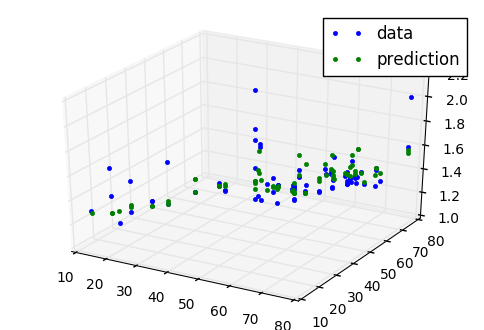

In [65]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=9, leaf_size=30)
kneighbor_regression.fit(X_train, Y_train)
Y_pred_train = kneighbor_regression.predict(X_test)

print("Score: "+str(kneighbor_regression.score(X_test, Y_test)))

fig = plt.figure()
ax = fig.gca(projection='3d')

x = X_test[:,18]
y = X_test[:,19]
z = Y_test

ax.plot(x, y, z, '.', label="data")
ax.plot(X_test[:,18],X_test[:,19],Y_pred_train, '.', label="prediction")

plt.legend(loc='best')
plt.show();

## Cross-Validation

Se implementa el regresor linial utilizando cross-validation pero los resultados no son mejores que los previos

In [89]:
from sklearn.cross_validation import cross_val_score
import numpy as np

for num_of_folds in range(2,20):
    scores = cross_val_score(regressor, data_X, data_Y, cv=num_of_folds)
    print("with "+str(num_of_folds)+" folds:"+ str(np.mean(scores)))

with 2 folds:-640.814932829
with 3 folds:-24.842255084
with 4 folds:-28.4141061297
with 5 folds:0.342825734154
with 6 folds:0.737105371955
with 7 folds:0.43276599909
with 8 folds:0.401261220555
with 9 folds:0.547906799401
with 10 folds:0.624799773751
with 11 folds:0.592216185353
with 12 folds:0.482622308688
with 13 folds:0.404403790943


with 14 folds:0.515513021192
with 15 folds:0.465547797697
with 16 folds:0.560738077762
with 17 folds:0.32923943297
with 18 folds:0.296173143136
with 19 folds:0.406492168914


Con 6 folds se obtuvo el mejor resultado